# SED Processing of CIGALE SED Decomposition fits
This script is used to explore and proccess some of the outputs from the fits files generated by the CIGALE SED decomposition. We intend for this to explore the AGN contribution with a more robust set of tools to see how AGN contamination effects UVJ and other diagnostics.

In [545]:
# Import all required packages
import matplotlib.pyplot as plt
import astropy.units as u
import numpy as np
import pandas as pd
import os
from astLib import astSED
import astropy.io.fits as fits
from carf import * # custom module for functions relating to the project
import matplotlib.path as mpath


# refresh

# So that we can change the helper functions without reloading the kernel
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [546]:
# The aim of this is to see how the SEDs of the galaxies are
# to this end what we do is read in some of the fits files
# Begin by importing just one of the fits files
gal_name= '9367_best_model.fits'
galaxy_path = os.path.join('datasets\student_fits_files\cdfs_best_models_fits', gal_name)
    
# Open the fits files <- needs to be different for CAT vs Fits files
with fits.open(galaxy_path) as data:
    df = pd.DataFrame(np.array(data[1].data).byteswap().newbyteorder())

In [547]:
# Filters
pb_U_path = os.path.join('datasets', 'Filters', 'Generic_Johnson.U.dat')
pb_V_path = os.path.join('datasets', 'Filters', 'Generic_Johnson.V.dat')
pb_J_path = os.path.join('datasets', 'Filters', '2MASS_2MASS.J.dat')


pb_U = astSED.Passband(pb_U_path, normalise=False)
pb_V = astSED.Passband(pb_V_path, normalise=False)
pb_J = astSED.Passband(pb_J_path, normalise=False)

In [548]:
df # We recall wavelength is in nanometers, we would like to immediately convert this to angstroms




df['wavelength'] = df['wavelength']*10

# For plotting reasons, convert to Janksys
# We are already in mJanksys
df['Snu'] = df['Fnu']*10**-3

# Converting into F_lambda
df['Flambda'] = df['Snu']*(3*10**-5)/(df['wavelength']**2)

In [549]:
df

wavelength       Fnu  L_lambda_total  stellar.old  stellar.young  \
0     1.902700e+01  0.000000    0.000000e+00          0.0            0.0   
1     2.184592e+01  0.000000    0.000000e+00          0.0            0.0   
2     2.508247e+01  0.000000    0.000000e+00          0.0            0.0   
3     2.879853e+01  0.000000    0.000000e+00          0.0            0.0   
4     3.306514e+01  0.000000    0.000000e+00          0.0            0.0   
...            ...       ...             ...          ...            ...   
4770  1.850846e+10  0.000016    6.134977e+18          0.0            0.0   
4771  1.859389e+10  0.000016    6.081121e+18          0.0            0.0   
4772  1.867972e+10  0.000016    6.027728e+18          0.0            0.0   
4773  1.885256e+10  0.000016    5.922350e+18          0.0            0.0   
4774  1.902700e+10  0.000016    5.818814e+18          0.0            0.0   

      nebular.absorption_old  nebular.absorption_young  nebular.lines_old  \
0                        0.0                       0.0                0.0   
1                        0.0                       0.0                0.0   
2                        0.0                       0.0                0.0   
3                        0.0                       0.0                0.0   
4                        0.0                       0.0                0.0   
...                      ...                       ...                ...   
4770                     0.0                       0.0                0.0   
4771                     0.0                       0.0                0.0   
4772                     0.0                       0.0                0.0   
4773                     0.0                       0.0                0.0   
4774                     0.0                       0.0                0.0   

      nebular.lines_young  nebular.continuum_old  ...  \
0                     0.0           0.000000e+00  ...   
1                     0.0           0.000000e+00  ...   
2                     0.0           0.000000e+00  ...   
3                     0.0           0.000000e+00  ...   
4                     0.0           0.000000e+00  ...   
...                   ...                    ...  ...   
4770                  0.0           5.923701e+16  ...   
4771                  0.0           5.871700e+16  ...   
4772                  0.0           5.820146e+16  ...   
4773                  0.0           5.718397e+16  ...   
4774                  0.0           5.618426e+16  ...   

      attenuation.nebular.lines_young  attenuation.nebular.continuum_old  \
0                                 0.0                       0.000000e+00   
1                                 0.0                       0.000000e+00   
2                                 0.0                       0.000000e+00   
3                                 0.0                       0.000000e+00   
4                                 0.0                       0.000000e+00   
...                               ...                                ...   
4770                             -0.0                      -7.814515e+06   
4771                             -0.0                      -7.688700e+06   
4772                             -0.0                      -7.564892e+06   
4773                             -0.0                      -7.323233e+06   
4774                             -0.0                      -7.089303e+06   

      attenuation.nebular.continuum_young  dust  agn.SKIRTOR2016_torus  \
0                            0.000000e+00   0.0                    0.0   
1                            0.000000e+00   0.0                    0.0   
2                            0.000000e+00   0.0                    0.0   
3                            0.000000e+00   0.0                    0.0   
4                            0.000000e+00   0.0                    0.0   
...                                   ...   ...                    ...   
4770                        -8.015084e+08   0.0       

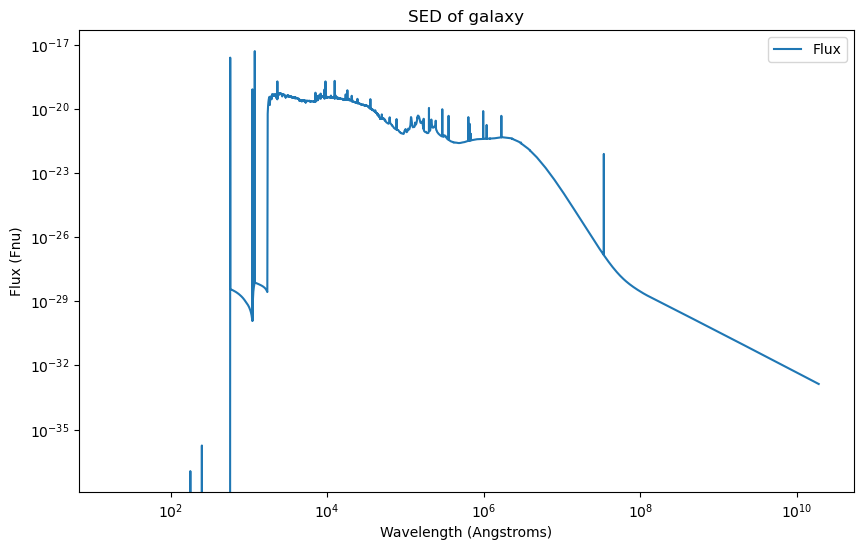

In [550]:

# Only plot between 10^3 and 10^5

# Do a logplot of the lines 
plt.figure(figsize=(10, 6))
plt.loglog(df['wavelength'], df['Flambda'], label='Flux')
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Flux (Fnu)')
# Change the limits from 10^3 to 10^5


#plt.ylim(1e-2, 1e2)


plt.title('SED of galaxy')
plt.legend()
plt.show()


In [551]:
# We can see that this kind of works. What we would now like to do, is extend this idea to a few more galaxies. Instead
# of one. We can read in say n number of galaxies, convert to what we use and then plot them all together
# We will be able to see that these galaxies are not restframed, we need to use the exported zpk from a previous file 
# to restframe them.

# Reading in the file containing the id's plus, filed, plus redshift
queiscent_transitions = pd.read_csv('outputs\quiescent_transition_ids.csv')

In [552]:
queiscent_transitions

# we can use something like this
# wavelengths = wavelengths / (1 + float(selected_redshifts[z_id]))

id     zpk field
0    22468  1.6739  CDFS
1    16807  1.5228  CDFS
2    11281  1.5864  CDFS
3    10413  1.5003  CDFS
4    13143  1.4925  CDFS
..     ...     ...   ...
434  13883  0.8058   UDS
435   1887  0.4364   UDS
436  17475  1.0974   UDS
437  19012  0.4129   UDS
438  14976  1.0550   UDS

[439 rows x 3 columns]

In [553]:
# now doing this lets select 5 galaxies, and plot their SEDS

# We will use the same code as above, but we will put it in a function, and then call this function for each of the galaxies
# that we have selected

def get_n_seds(n, restframe=False, all=False):
    # Select n galaxies
    
    df_list = []
    names = []
    redshifts = []
    if all==False:
        selected_galaxies = queiscent_transitions.sample(n)
    else: 
        selected_galaxies = queiscent_transitions
        
    # Reset the index
    selected_galaxies = selected_galaxies.reset_index(drop=True)
    
    # name 
    gal_name = selected_galaxies['id'].astype(str)
    
    # field
    gal_field = selected_galaxies['field'].astype(str)
    
    
    names = gal_field + '_' + gal_name
    
    if restframe:
        # redshift
        gal_redshift = selected_galaxies['zpk'].astype(float)
    # Now we will read in the fits files for these galaxies

    for i in range(len(selected_galaxies)):
        path = 'datasets\student_fits_files\\'+ str(gal_field[i]).lower() +'_best_models_fits\\'
        name = str(gal_name[i])+'_best_model.fits'

        galaxy_path = os.path.join(path, name)
        with fits.open(galaxy_path) as data:
            df = pd.DataFrame(np.array(data[1].data).byteswap().newbyteorder())
        
        # Convert to angstroms
        df['wavelength'] = df['wavelength']*10

        if restframe:
            print(gal_redshift[i])
            redshift_Val = gal_redshift[i]
            df['wavelength'] = df['wavelength'] / (1 + gal_redshift[i])
            redshifts.append(redshift_Val)
            
        
        # Convert flux values
        df['Snu'] = df['Fnu']*10**-3 # milliJanksys to Janksys
        
        df['Flambda'] = df['Snu']*(3*10**-5)/(df['wavelength']**2) # S_nu to F_lambda <- angstroms 
        
        # For simplicity, just create some extra columns
        df['lambda (Angstroms)'] = df['wavelength']
        df['Total Flux (erg/s/cm^2/Angstrom)'] = df['Flambda']
        
        
        
        
        df_list.append(df)
        
        
        plt.loglog(df['wavelength'], df['Flambda'])
    plt.xlabel('Wavelength (Angstroms)')
    plt.ylabel('Flux (Fnu)')
    #plt.xlim(1e3, 1e5)
    plt.ylim(1e-30, 1e-2)
    plt.title('SED of galaxies')
    plt.legend()
    plt.show()
    
    print(len(df_list))
    
    return df_list, names, redshifts

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


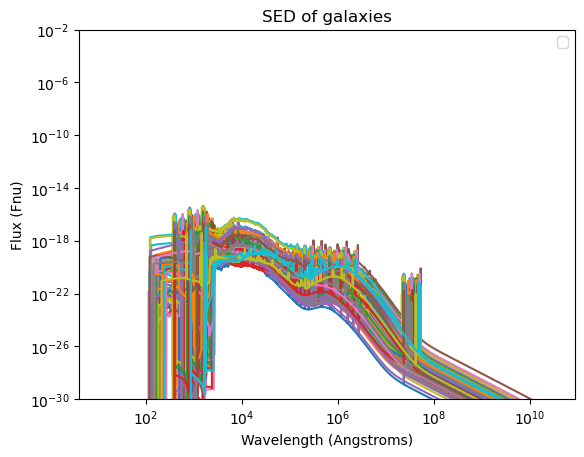

100


([        wavelength       Fnu  L_lambda_total  stellar.old  stellar.young  \
  0     2.648200e+01  0.000000    0.000000e+00          0.0            0.0   
  1     3.040540e+01  0.000000    0.000000e+00          0.0            0.0   
  2     3.491007e+01  0.000000    0.000000e+00          0.0            0.0   
  3     4.008213e+01  0.000000    0.000000e+00          0.0            0.0   
  4     4.602044e+01  0.000000    0.000000e+00          0.0            0.0   
  ...            ...       ...             ...          ...            ...   
  4770  2.576029e+10  0.000255    2.176521e+20          0.0            0.0   
  4771  2.587919e+10  0.000255    2.157414e+20          0.0            0.0   
  4772  2.599865e+10  0.000255    2.138472e+20          0.0            0.0   
  4773  2.623921e+10  0.000255    2.101087e+20          0.0            0.0   
  4774  2.648200e+10  0.000256    2.064355e+20          0.0            0.0   
  
        nebular.absorption_old  nebular.absorption_young  neb

In [554]:
# Now that we have the ids + photometric redshifts, 
get_n_seds(100)

0.5313
1.0998
1.5282
0.2266
0.3422
1.1317
1.2288
0.4607
0.4096
0.2975
0.6248
0.8814
1.7448
1.0995
1.4681
1.1887
1.0974
0.4129
0.2673
1.8097
0.4995
1.8099
0.4828
1.0336
0.2252
0.6243
1.6739
1.0866
1.6896
1.0336
0.2437
0.599
1.6648
1.2718
0.7895
0.6599
1.2275
1.3781
0.6408
0.574
1.8703
0.7385
0.6369
1.367
1.285
0.7096
1.0603
0.2155
0.9862
0.4788
1.7419
0.3657
1.5883
1.1115
0.3459
0.9541
0.5861
1.5166
0.725
1.1131
0.9959
0.7962
0.2378
0.5718
0.7398
0.3361
1.934
1.6179
0.5924
1.2432
1.4749
1.7034
0.9825
0.7045
0.2687
1.9808
0.3519
0.5972
0.6275
1.4393
0.5526
1.6092
0.5313
0.8745
1.177
1.0222
1.055
1.8664
0.6051
1.6872
1.4413
0.9153
0.3825
1.2873
0.5987
1.5461
0.3153
0.8901
0.9084


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1.0101


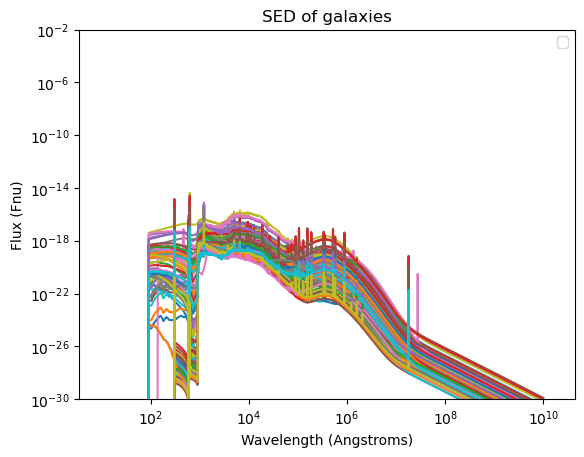

100


([        wavelength       Fnu  L_lambda_total  stellar.old  stellar.young  \
  0     1.001763e+01  0.000000    0.000000e+00          0.0            0.0   
  1     1.150178e+01  0.000000    0.000000e+00          0.0            0.0   
  2     1.320581e+01  0.000000    0.000000e+00          0.0            0.0   
  3     1.516230e+01  0.000000    0.000000e+00          0.0            0.0   
  4     1.740865e+01  0.000000    0.000000e+00          0.0            0.0   
  ...            ...       ...             ...          ...            ...   
  4770  9.744624e+09  0.000253    4.069605e+19          0.0            0.0   
  4771  9.789601e+09  0.000253    4.033880e+19          0.0            0.0   
  4772  9.834790e+09  0.000253    3.998462e+19          0.0            0.0   
  4773  9.925790e+09  0.000254    3.928560e+19          0.0            0.0   
  4774  1.001763e+10  0.000254    3.859880e+19          0.0            0.0   
  
        nebular.absorption_old  nebular.absorption_young  neb

In [555]:
get_n_seds(100, restframe=True)

We can see by using this code that we can read in the 'best fit' models of these SEDS and rest frame them using their zpk value. Now we can extend this code as required

1.6739
1.5228
1.5864
1.5003
1.4925
1.2842
1.6092
1.1115
1.5764
1.0995
1.6511
1.5906
1.5426
1.6597
1.8703
1.1977
1.1317
1.1545
1.6277
0.8613
0.3153
1.325
1.2382
0.2567
1.6503
1.6872
0.4672
0.8162
0.5422
0.9954
1.645
0.6919
0.7096
0.7038
0.7859
1.343
1.7448
1.6896
0.6567
0.7574
1.4749
0.654
0.7453
1.3583
1.2538
0.4034
1.2275
0.7823
0.5794
0.6674
1.0953
1.2348
0.9085
0.6648
1.285
1.2113
1.5967
0.7252
1.6497
0.9488
0.3899
1.6747
0.6349
1.5033
1.593
0.7045
0.6763
0.6634
0.3221
0.5416
1.3293
1.367
0.7151
1.5386
0.7163
0.2378
0.5733
0.6469
1.3781
0.7017
0.5192
0.7541
0.596
0.7421
0.5174
0.6193
0.6414
0.4788
1.3405
0.8745
0.8185
0.725
1.6482
0.7048
0.6675
0.6918
0.988
0.5225
0.6365
0.4063
0.6745
0.6252
0.7485
1.6045
0.3825
0.334
1.8703
0.7045
0.7352
1.0998
0.7687
1.9343
0.7398
0.6222
1.0647
0.5185
0.5547
0.9796
0.5313
0.4661
0.6806
0.9027
1.0377
0.7459
0.5987
0.5749
0.7334
0.7385
1.0277
0.734
0.6549
0.5491
0.6015
0.5313
0.6518
0.716
0.3617
0.7308
0.4096
0.5809
0.583
0.7094
0.2904
0.9541
0.6602

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.4129
1.055


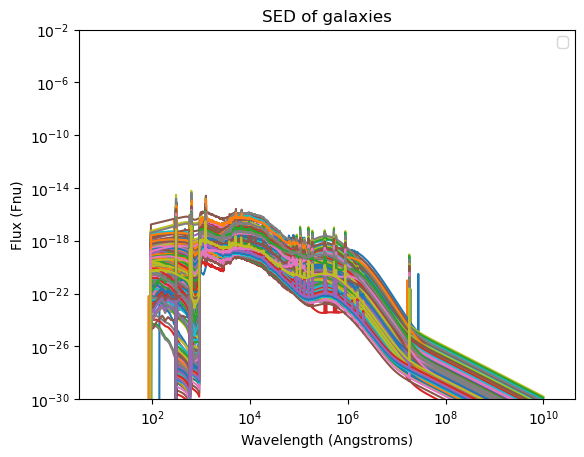

439


In [556]:
best_fit_seds, names, redshifts = get_n_seds(100, restframe=True, all=True)


In [557]:
len(best_fit_seds)

439

In [558]:
len(names)
names

0      CDFS_22468
1      CDFS_16807
2      CDFS_11281
3      CDFS_10413
4      CDFS_13143
          ...    
434     UDS_13883
435      UDS_1887
436     UDS_17475
437     UDS_19012
438     UDS_14976
Length: 439, dtype: object

In [559]:
# For simplicity, for each of the names, have a dictionary entry with the associated dataframe
# This will make it easier to access the dataframes
# We will also convert the names to a list
names = names.tolist()


In [560]:
# names

# # setting up the dictionary
# best_fit_seds_dict = dict(zip(names, best_fit_seds))


In [561]:
# best_fit_seds_dict

In [562]:
# Seperately we would like to just acces best_fit_seds
# best_fit_seds


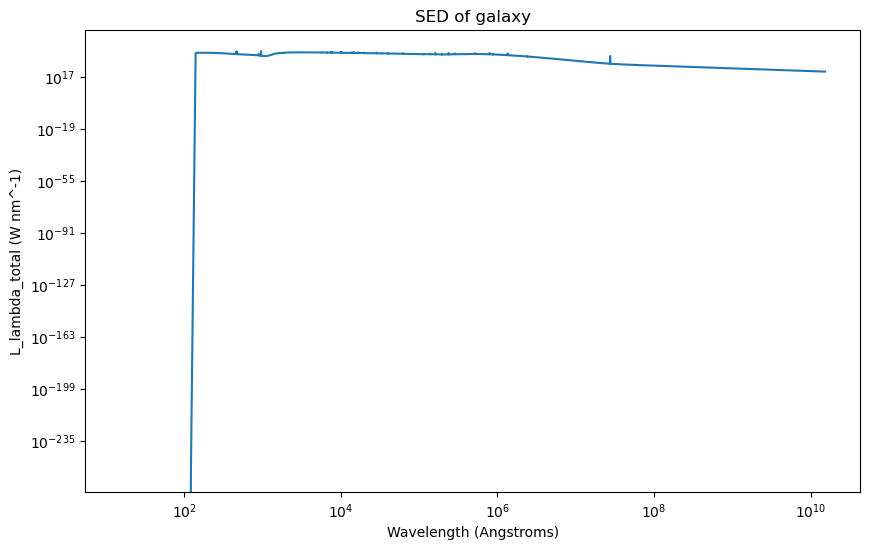

In [563]:
# Lets just explore the first restframed galaxy with everything plotted
sed_0 = best_fit_seds[0]


plt.figure(figsize=(10, 6))
plt.loglog(sed_0['wavelength'], sed_0['L_lambda_total'], label='')
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('L_lambda_total (W nm^-1)')
#plt.ylim(1e-30, 1e-2)
plt.title('SED of galaxy')
plt.show()

Happily we see the best fit SEDS are correct in terms of their restframed shape and position. This means that these SEDS can therefore be used. But this is not all as we also need to explore the other ontributions
which are shown in the dataframe
best_fit_seds

In [564]:
# we are going to try and plot the SEDs to see the differences, and export an ID, and UVJ colours (recalling UVJ are inherently restframed)
# We will use a similar techinques as previous scripts have done
# Using our previous technique


# Get one de-redshifted template
# We will use the selection of them
best_fit_seds

[        wavelength       Fnu  L_lambda_total  stellar.old  stellar.young  \
 0     1.529788e+01  0.000000    0.000000e+00          0.0            0.0   
 1     1.756432e+01  0.000000    0.000000e+00          0.0            0.0   
 2     2.016653e+01  0.000000    0.000000e+00          0.0            0.0   
 3     2.315428e+01  0.000000    0.000000e+00          0.0            0.0   
 4     2.658467e+01  0.000000    0.000000e+00          0.0            0.0   
 ...            ...       ...             ...          ...            ...   
 4770  1.488097e+10  0.000399    6.574869e+20          0.0            0.0   
 4771  1.494965e+10  0.000399    6.517152e+20          0.0            0.0   
 4772  1.501866e+10  0.000400    6.459931e+20          0.0            0.0   
 4773  1.515763e+10  0.000400    6.346997e+20          0.0            0.0   
 4774  1.529788e+10  0.000400    6.236037e+20          0.0            0.0   
 
       nebular.absorption_old  nebular.absorption_young  nebular.lines_old

In [565]:
# Now we would like to, for each of the templates calculate a colour
# -  now we can go and have a look, creating colours are required

best_fit_seds[0]


wavelength       Fnu  L_lambda_total  stellar.old  stellar.young  \
0     1.529788e+01  0.000000    0.000000e+00          0.0            0.0   
1     1.756432e+01  0.000000    0.000000e+00          0.0            0.0   
2     2.016653e+01  0.000000    0.000000e+00          0.0            0.0   
3     2.315428e+01  0.000000    0.000000e+00          0.0            0.0   
4     2.658467e+01  0.000000    0.000000e+00          0.0            0.0   
...            ...       ...             ...          ...            ...   
4770  1.488097e+10  0.000399    6.574869e+20          0.0            0.0   
4771  1.494965e+10  0.000399    6.517152e+20          0.0            0.0   
4772  1.501866e+10  0.000400    6.459931e+20          0.0            0.0   
4773  1.515763e+10  0.000400    6.346997e+20          0.0            0.0   
4774  1.529788e+10  0.000400    6.236037e+20          0.0            0.0   

      nebular.absorption_old  nebular.absorption_young  nebular.lines_old  \
0                        0.0                       0.0                0.0   
1                        0.0                       0.0                0.0   
2                        0.0                       0.0                0.0   
3                        0.0                       0.0                0.0   
4                        0.0                       0.0                0.0   
...                      ...                       ...                ...   
4770                     0.0                       0.0                0.0   
4771                     0.0                       0.0                0.0   
4772                     0.0                       0.0                0.0   
4773                     0.0                       0.0                0.0   
4774                     0.0                       0.0                0.0   

      nebular.lines_young  nebular.continuum_old  ...  \
0                     0.0           0.000000e+00  ...   
1                     0.0           0.000000e+00  ...   
2                     0.0           0.000000e+00  ...   
3                     0.0           0.000000e+00  ...   
4                     0.0           0.000000e+00  ...   
...                   ...                    ...  ...   
4770                  0.0           2.722950e+18  ...   
4771                  0.0           2.699046e+18  ...   
4772                  0.0           2.675349e+18  ...   
4773                  0.0           2.628577e+18  ...   
4774                  0.0           2.582624e+18  ...   

      attenuation.nebular.continuum_young  dust  agn.SKIRTOR2016_torus  \
0                            0.000000e+00   0.0                    0.0   
1                            0.000000e+00   0.0                    0.0   
2                            0.000000e+00   0.0                    0.0   
3                            0.000000e+00   0.0                    0.0   
4                            0.000000e+00   0.0                    0.0   
...                                   ...   ...                    ...   
4770                        -1.727522e+11   0.0                    0.0   
4771                        -1.699708e+11   0.0                    0.0   
4772                        -1.672339e+11   0.0                    0.0   
4773                        -1.618917e+11   0.0                    0.0   
4774                        -1.567202e+11   0.0                    0.0   

      agn.SKIRTOR2016_polar_dust  agn.SKIRTOR2016_disk  igm           Snu  \
0                            0.0                   0.0 -0.0  0.000000e+00   
1                            0.0                   0.0 -0.0  0.000000e+00   
2                            0.0                   0.0 -0.0  0.000000e+00   
3                            0.0                   0.0 -0.0  0.000000e+00   
4                            0.0                   0.0 -0.0  0.000000e+00   
...                          ...                   ...  ...           ...   
4770                         0.0                   0.0  0

In [566]:
# for each of the entries, we will create a list of the ID, and the UVJ colours, remembering these are rest framed

export_df = pd.DataFrame(columns=['ID', 'UV', 'VJ'])


In [567]:
export_df

Empty DataFrame
Columns: [ID, UV, VJ]
Index: []

In [568]:
# Create the colours cigale outputs
best_fit_seds[0]

wavelength       Fnu  L_lambda_total  stellar.old  stellar.young  \
0     1.529788e+01  0.000000    0.000000e+00          0.0            0.0   
1     1.756432e+01  0.000000    0.000000e+00          0.0            0.0   
2     2.016653e+01  0.000000    0.000000e+00          0.0            0.0   
3     2.315428e+01  0.000000    0.000000e+00          0.0            0.0   
4     2.658467e+01  0.000000    0.000000e+00          0.0            0.0   
...            ...       ...             ...          ...            ...   
4770  1.488097e+10  0.000399    6.574869e+20          0.0            0.0   
4771  1.494965e+10  0.000399    6.517152e+20          0.0            0.0   
4772  1.501866e+10  0.000400    6.459931e+20          0.0            0.0   
4773  1.515763e+10  0.000400    6.346997e+20          0.0            0.0   
4774  1.529788e+10  0.000400    6.236037e+20          0.0            0.0   

      nebular.absorption_old  nebular.absorption_young  nebular.lines_old  \
0                        0.0                       0.0                0.0   
1                        0.0                       0.0                0.0   
2                        0.0                       0.0                0.0   
3                        0.0                       0.0                0.0   
4                        0.0                       0.0                0.0   
...                      ...                       ...                ...   
4770                     0.0                       0.0                0.0   
4771                     0.0                       0.0                0.0   
4772                     0.0                       0.0                0.0   
4773                     0.0                       0.0                0.0   
4774                     0.0                       0.0                0.0   

      nebular.lines_young  nebular.continuum_old  ...  \
0                     0.0           0.000000e+00  ...   
1                     0.0           0.000000e+00  ...   
2                     0.0           0.000000e+00  ...   
3                     0.0           0.000000e+00  ...   
4                     0.0           0.000000e+00  ...   
...                   ...                    ...  ...   
4770                  0.0           2.722950e+18  ...   
4771                  0.0           2.699046e+18  ...   
4772                  0.0           2.675349e+18  ...   
4773                  0.0           2.628577e+18  ...   
4774                  0.0           2.582624e+18  ...   

      attenuation.nebular.continuum_young  dust  agn.SKIRTOR2016_torus  \
0                            0.000000e+00   0.0                    0.0   
1                            0.000000e+00   0.0                    0.0   
2                            0.000000e+00   0.0                    0.0   
3                            0.000000e+00   0.0                    0.0   
4                            0.000000e+00   0.0                    0.0   
...                                   ...   ...                    ...   
4770                        -1.727522e+11   0.0                    0.0   
4771                        -1.699708e+11   0.0                    0.0   
4772                        -1.672339e+11   0.0                    0.0   
4773                        -1.618917e+11   0.0                    0.0   
4774                        -1.567202e+11   0.0                    0.0   

      agn.SKIRTOR2016_polar_dust  agn.SKIRTOR2016_disk  igm           Snu  \
0                            0.0                   0.0 -0.0  0.000000e+00   
1                            0.0                   0.0 -0.0  0.000000e+00   
2                            0.0                   0.0 -0.0  0.000000e+00   
3                            0.0                   0.0 -0.0  0.000000e+00   
4                            0.0                   0.0 -0.0  0.000000e+00   
...                          ...                   ...  ...           ...   
4770                         0.0                   0.0  0

In [569]:
# try using the composite colours function 
# for each value in best fit seds, make an output in a list

best_fits = [x for x in best_fit_seds]



In [570]:

uv_0, vj_0 = generate_UVJ_composite_set_colours([best_fit_seds], [0], pb_U, pb_V, pb_J)

0       1.529788e+01
1       1.756432e+01
2       2.016653e+01
3       2.315428e+01
4       2.658467e+01
            ...     
4770    1.488097e+10
4771    1.494965e+10
4772    1.501866e+10
4773    1.515763e+10
4774    1.529788e+10
Name: lambda (Angstroms), Length: 4775, dtype: float64
0       1.000000e+01
1       1.148154e+01
2       1.318257e+01
3       1.513561e+01
4       1.737801e+01
            ...     
4770    9.727472e+09
4771    9.772370e+09
4772    9.817479e+09
4773    9.908319e+09
4774    1.000000e+10
Name: lambda (Angstroms), Length: 4775, dtype: float64
0       1.000000e+01
1       1.148154e+01
2       1.318257e+01
3       1.513561e+01
4       1.737801e+01
            ...     
4770    9.727472e+09
4771    9.772370e+09
4772    9.817479e+09
4773    9.908319e+09
4774    1.000000e+10
Name: lambda (Angstroms), Length: 4775, dtype: float64
0       1.000000e+01
1       1.148154e+01
2       1.318257e+01
3       1.513561e+01
4       1.737801e+01
            ...     
4770    9.727472

In [571]:
uv_0
vj_0

[[1.0900450729207414,
  0.22575358537447343,
  0.4506096673620483,
  0.3259799861969057,
  0.32693431535010475,
  0.4385607278409829,
  0.6131079470765108,
  0.4985086641659535,
  0.5071715159455863,
  0.4385607278409793,
  0.3750857161166792,
  0.5577435771403643,
  0.6702556126645973,
  0.3750857161166756,
  0.5577435771403607,
  0.3750857161166721,
  0.5577435771403607,
  0.6213353576196354,
  0.4879939174892023,
  0.8877266633368812,
  0.7436358581362938,
  0.908283691589503,
  0.6211530224664017,
  1.213302371207753,
  0.9022566455868848,
  0.6315681799744581,
  0.6211530224663946,
  0.865347247281818,
  1.0900247191336128,
  1.4104611213150342,
  1.0241104872931963,
  1.4559590637524806,
  0.8638383299718413,
  0.8638383299718484,
  1.013709831769738,
  1.1020110860549082,
  1.7025068145596194,
  1.0984028705926114,
  0.8638383299718413,
  0.8641743659505998,
  1.3432175954360446,
  0.8718365574519531,
  0.9005631563498717,
  0.9356157478145661,
  1.1066982156262561,
  0.86383832

In [572]:
# now we can add this to the df


In [573]:
names

['CDFS_22468',
 'CDFS_16807',
 'CDFS_11281',
 'CDFS_10413',
 'CDFS_13143',
 'CDFS_12321',
 'CDFS_11857',
 'CDFS_13517',
 'CDFS_25717',
 'CDFS_13103',
 'CDFS_11154',
 'CDFS_16270',
 'CDFS_18441',
 'CDFS_15326',
 'CDFS_17116',
 'CDFS_16530',
 'CDFS_9580',
 'CDFS_13106',
 'CDFS_15163',
 'CDFS_25203',
 'CDFS_25830',
 'CDFS_9310',
 'CDFS_19584',
 'CDFS_11696',
 'CDFS_17417',
 'CDFS_18838',
 'CDFS_10114',
 'CDFS_18797',
 'CDFS_29552',
 'CDFS_25294',
 'CDFS_20666',
 'CDFS_28340',
 'CDFS_17899',
 'CDFS_25995',
 'CDFS_26267',
 'CDFS_12331',
 'CDFS_16078',
 'CDFS_26038',
 'CDFS_27015',
 'CDFS_13396',
 'CDFS_10864',
 'CDFS_9001',
 'CDFS_15440',
 'CDFS_18938',
 'CDFS_18006',
 'CDFS_13227',
 'CDFS_28244',
 'CDFS_26825',
 'CDFS_7457',
 'CDFS_17814',
 'CDFS_25652',
 'CDFS_16196',
 'CDFS_21822',
 'CDFS_22580',
 'CDFS_24723',
 'CDFS_6455',
 'CDFS_16152',
 'CDFS_28846',
 'CDFS_25501',
 'CDFS_19115',
 'CDFS_23050',
 'CDFS_28259',
 'CDFS_10969',
 'CDFS_19429',
 'CDFS_29283',
 'CDFS_9289',
 'CDFS_28769',
 

In [574]:
uv = uv_0[0]
vj = vj_0[0]

In [575]:
# Now we have our id's, our UV and VJ values, we can fully export this to a csv file
# adding all UVJ colours into the dataframe
export_df['ID'] = names
export_df['UV'] = uv
export_df['VJ'] = vj
export_df['zpk'] = redshifts


In [576]:
export_df

ID        UV        VJ     zpk
0    CDFS_22468  0.790783  1.090045  1.6739
1    CDFS_16807  0.509884  0.225754  1.5228
2    CDFS_11281  0.742645  0.450610  1.5864
3    CDFS_10413  0.646226  0.325980  1.5003
4    CDFS_13143  0.646008  0.326934  1.4925
..          ...       ...       ...     ...
434   UDS_13883  1.380354  0.863838  0.8058
435    UDS_1887  1.473628  0.972323  0.4364
436   UDS_17475  1.560590  1.375327  1.0974
437   UDS_19012  2.224120  1.325729  0.4129
438   UDS_14976  1.457816  0.973963  1.0550

[439 rows x 4 columns]

In [577]:
# We can attempt to plot this UVJ diagram, recalling that we are hopefully going to be seeing only values in the quiescent region

def plot_uvj_nocategorise(df, x, y):
    plt.figure(figsize=(6, 6))

    xmax = 2.2
    ymax = 2.5
    xmin = -0.5
    ymin = 0

    # Set the plotting limits
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)

    # Define the points for a quiescent galaxy selection
    x_points = [-0.5, 0.85, 1.6, 1.6]
    y_points = [1.3, 1.3, 1.95, 2.5]

    # Plot the points
    plt.plot(x_points, y_points, linestyle='-')

    # as all the points have associated names, plot the names
    #for i, txt in enumerate(df['ID']):
    #    plt.annotate(txt, (x[i], y[i]))
        


    # Interpolate the y-value at x=1.2
    x_target = 1.2
    y_target = np.interp(x_target, x_points, y_points)

    # Plot the interpolated point, this separates everything on the right as dusty galaxies,
    # and everything on the left as star-forming galaxies
    plt.plot([x_target, x_target], [0, y_target], linestyle='--')

    quiescent_x = [-0.5, 0.85, 1.6, 1.6, xmin, xmin]
    quiescent_y = [1.3, 1.3, 1.95, 2.5, ymax, 1.3]
    # We want to make a wedge selection for the Quiescent Selection of Galaxies
    points = np.column_stack([x, y])
    verts = np.array([quiescent_x, quiescent_y]).T
    path = mpath.Path(verts)


    # Define the path for point selection
    #selected_path = mpath.Path([(2, 3), (6, 4), (8, 2), (2, 1), (2, 3)])  # Example path, replace with your own

    # Use path.contains_points to get a boolean array
    points_inside_selection = path.contains_points(np.column_stack([x, y]))



    dusty_condition = (points[:, 0] > x_target) & (~points_inside_selection)
    star_forming_condition = (points[:, 0] < x_target) & (~points_inside_selection)



    # Filter the DataFrame using the boolean array
    selected_df = df[points_inside_selection] # For quiescent, clean later



    # Sort the quiescent and non-quiescent galaxies
    quiescent_points = points[path.contains_points(points)]
    # Find the points from here to categorise dusty, and star-forming galaxies
    non_quiescent_points = points[~path.contains_points(points)]
    dusty_galaxies_points = non_quiescent_points[non_quiescent_points[:, 0] > x_target]
    star_forming_galaxies_points = non_quiescent_points[non_quiescent_points[:, 0] < x_target]



    # print the number of galaxies that are in each category
    print(f'Number of Quiescent Galaxies: {len(quiescent_points)}')
    print(f'Number of Dusty Galaxies: {len(dusty_galaxies_points)}')
    print(f'Number of Star Forming Galaxies: {len(star_forming_galaxies_points)}')
    
    #print(non_quiescent_points[0][0])

    #print(y)
    # Plot the selected points
    #plt.scatter(x, y, s=3, alpha=0.5, label='Not Quiescent Selection')
    plt.scatter(quiescent_points[:, 0], quiescent_points[:, 1], c='r', s=3, alpha=0.5, label='Quiescent Selection')
    plt.scatter(dusty_galaxies_points[:, 0], dusty_galaxies_points[:, 1], c='g', s=3, alpha=0.5, label='Dusty Galaxies')
    plt.scatter(star_forming_galaxies_points[:, 0], star_forming_galaxies_points[:, 1], c='b', s=3, alpha=0.5, label='Star Forming Galaxies')

    plt.xlabel('Restframe V-J [Mag]')
    plt.ylabel('Restframe U-V [Mag]')
    plt.title('UVJ Diagram for the all fields')
    plt.legend()
    plt.show()



Number of Quiescent Galaxies: 260
Number of Dusty Galaxies: 81
Number of Star Forming Galaxies: 98


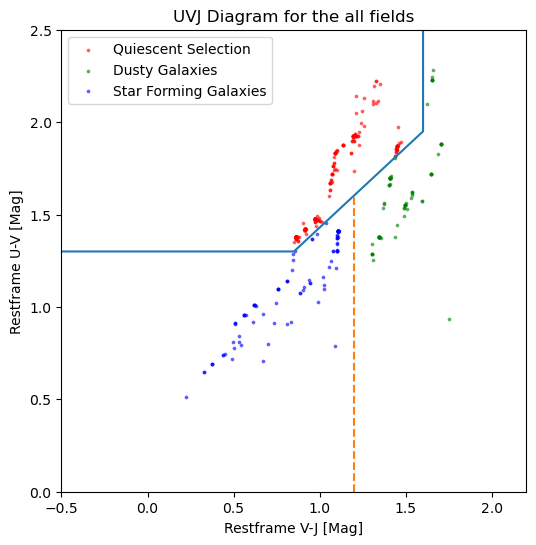

In [578]:
plot_uvj_nocategorise(export_df, export_df['VJ'], export_df['UV'])

In [579]:
cdfs = export_df[export_df['ID'].str.contains('CDFS_16807')]

In [580]:
cdfs

ID        UV        VJ     zpk
1  CDFS_16807  0.509884  0.225754  1.5228

In [581]:
# For completness we can read in associated ZFOURGE files and plot them 
zfourge_path = 'datasets/zfourge/'

# Read in ZFourge Data in each field

#CDFS, COSMOS, UDS
cdfs_df = read_zfourge_data('CDFS', zfourge_path)
cosmos_df = read_zfourge_data('COSMOS', zfourge_path)
uds_df = read_zfourge_data('UDS', zfourge_path)

# as a dataframe
cdfs_recalcUVJids = pd.read_csv('datasets/zfourge/CDFS_RecalculatedUVJids_full.csv')
cosomos_recalcUVJids = pd.read_csv('datasets/zfourge/COSMOS_RecalculatedUVJids_full.csv')
uds_recalcUVJids = pd.read_csv('datasets/zfourge/UDS_RecalculatedUVJids_full.csv')


cdfs_recalcUVJids = cdfs_recalcUVJids.rename(columns={'ID':'id'})
cosomos_recalcUVJids = cosomos_recalcUVJids.rename(columns={'ID':'id'})
uds_recalcUVJids = uds_recalcUVJids.rename(columns={'ID':'id'})


c:\Users\Titan\Anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Titan\Anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Titan\OneDrive\Documents\GitHub\HonoursResearchProject\carf.py:1044: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.loc[:, 'mag_V'] = flux_to_mag(df['V'])
c:\Users\Titan\Anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Titan\OneDrive\Documents\GitHub\HonoursResearchProject\carf.p

In [582]:
# Merge the recalculated UVJ id's with the original dataframes
cdfs_df = pd.merge(cdfs_df, cdfs_recalcUVJids, on='id')
cosmos_df = pd.merge(cosmos_df, cosomos_recalcUVJids, on='id')
uds_df = pd.merge(uds_df, uds_recalcUVJids, on='id')

In [583]:
# Making one dataframe
frames = [cdfs_df, cosmos_df, uds_df]
zfourge_df = pd.concat(frames)


In [584]:
zfourge_df

recno         id      xpos      ypos    RAJ2000    DEJ2000  SE  isoArea  \
0      5886  CDFS_5886  4903.505  2218.433  53.061234 -27.882744   3    182.0   
1      5928  CDFS_5928  4865.992  2198.946  53.063004 -27.883558   3     68.0   
2      5972  CDFS_5972  4686.141  2261.246  53.071480 -27.880964   2    300.0   
3      6034  CDFS_6034  4700.024  2220.552  53.070828 -27.882660   3     30.0   
4      6049  CDFS_6049  4693.510  2218.716  53.071133 -27.882736   3     16.0   
...     ...        ...       ...       ...        ...        ...  ..      ...   
6307  22073  UDS_22073   893.519  4929.281  34.391899  -5.111294   0     58.0   
6308  22077  UDS_22077   529.058  4942.281  34.407147  -5.110752   3    161.0   
6309  22078  UDS_22078   982.913  4997.860  34.388161  -5.108436   0    167.0   
6310  22086  UDS_22086  4080.163  4739.570  34.258579  -5.119182   0    130.0   
6311  22089  UDS_22089  1936.303  4837.703  34.348274  -5.115107   2    489.0   

         FKsap  e_FKsap  ...        FH     e_FH  w_FH        FK     e_FK  \
0      3.09289  0.10266  ...       NaN      NaN   NaN       NaN      NaN   
1      3.42457  0.10040  ...       NaN      NaN   NaN       NaN      NaN   
2      8.39165  0.08648  ...       NaN      NaN   NaN       NaN      NaN   
3      0.51288  0.09210  ...       NaN      NaN   NaN       NaN      NaN   
4      0.33930  0.09267  ...       NaN      NaN   NaN       NaN      NaN   
...        ...      ...  ...       ...      ...   ...       ...      ...   
6307   1.03939  0.07892  ...   1.99784  0.30258   1.0   2.13933  0.21462   
6308   3.08937  0.08013  ...   5.38064  0.34642   1.0   7.73447  0.23584   
6309   5.49590  0.08340  ...  11.21525  0.33582   1.0  14.09349  0.24023   
6310   2.54756  0.06966  ...   6.33329  0.34497   1.0   6.28376  0.20835   
6311  14.79832  0.07613  ...  34.73541  0.46701   1.0  50.08019  0.32208   

      w_FK  FY  e_FY  w_FY  wminAll  
0      NaN NaN   NaN   NaN      NaN  
1      NaN NaN   NaN   NaN      NaN  
2      NaN NaN   NaN   NaN      NaN  
3      NaN NaN   NaN   NaN      NaN  
4      NaN NaN   NaN   NaN      NaN  
...    ...  ..   ...   ...      ...  
6307  0.77 NaN   NaN   0.0     0.67  
6308  0.85 NaN   NaN   0.0     0.65  
6309  0.76 NaN   NaN   0.0     0.60  
6310  1.06 NaN   NaN   0.0     0.86  
6311  0.82 NaN   NaN   0.0     0.72  

[20960 rows x 264 columns]

In [585]:
export_df

ID        UV        VJ     zpk
0    CDFS_22468  0.790783  1.090045  1.6739
1    CDFS_16807  0.509884  0.225754  1.5228
2    CDFS_11281  0.742645  0.450610  1.5864
3    CDFS_10413  0.646226  0.325980  1.5003
4    CDFS_13143  0.646008  0.326934  1.4925
..          ...       ...       ...     ...
434   UDS_13883  1.380354  0.863838  0.8058
435    UDS_1887  1.473628  0.972323  0.4364
436   UDS_17475  1.560590  1.375327  1.0974
437   UDS_19012  2.224120  1.325729  0.4129
438   UDS_14976  1.457816  0.973963  1.0550

[439 rows x 4 columns]

In [586]:
# Select subset of the zfourge_df where both id's are present
zfourge_df = zfourge_df[zfourge_df['id'].isin(export_df['ID'])]

In [587]:
# # Choose subset with only 1 field
# zfourge_df = zfourge_df[zfourge_df['field'] == 'COSMOS']

# # Likewise for the export_df
# export_df = export_df[export_df['ID'].isin(zfourge_df['id'])]


Number of Quiescent Galaxies: 133
Number of Dusty Galaxies: 67
Number of Star Forming Galaxies: 239


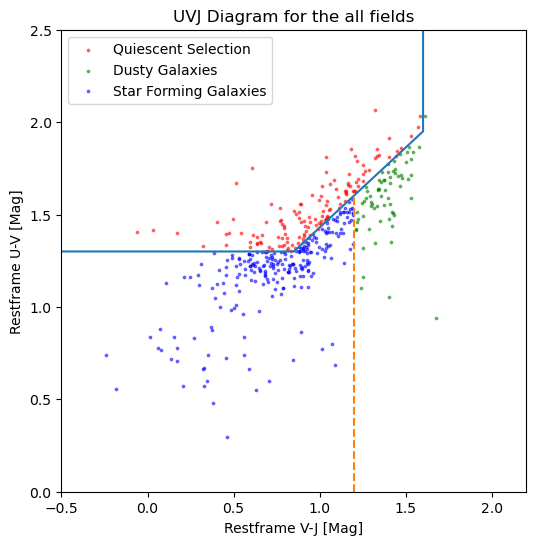

In [588]:
# Plot the UVJ diagram for the ZFOURGE galaxies
plot_uvj_nocategorise(zfourge_df, zfourge_df['VJ'], zfourge_df['UV'])

Number of Quiescent Galaxies: 260
Number of Dusty Galaxies: 81
Number of Star Forming Galaxies: 98


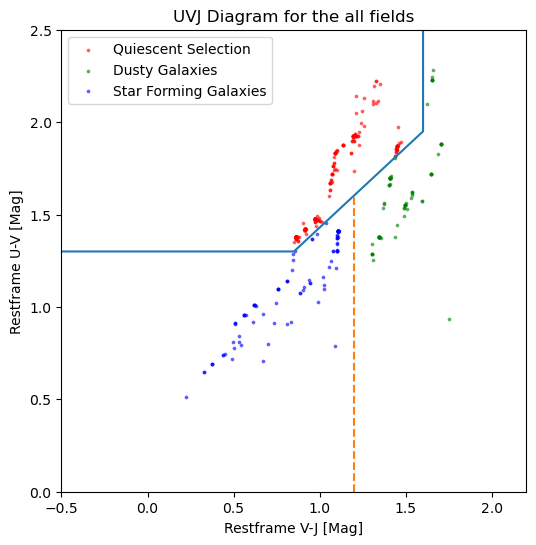

In [589]:
# Plotting this using my quiescent transitions calculated from ollie's data
plot_uvj_nocategorise(export_df, export_df['VJ'], export_df['UV'])

Number of Quiescent Galaxies: 439
Number of Dusty Galaxies: 0
Number of Star Forming Galaxies: 0


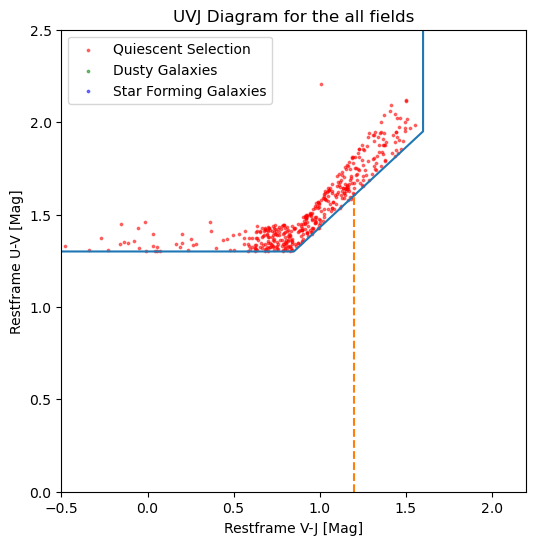

In [590]:
# Now plotting using my original selection of transition ID's
# using the VJ_0 and UV_0 columns
plot_uvj_nocategorise(zfourge_df, zfourge_df['VJ_0'], zfourge_df['UV_0'])

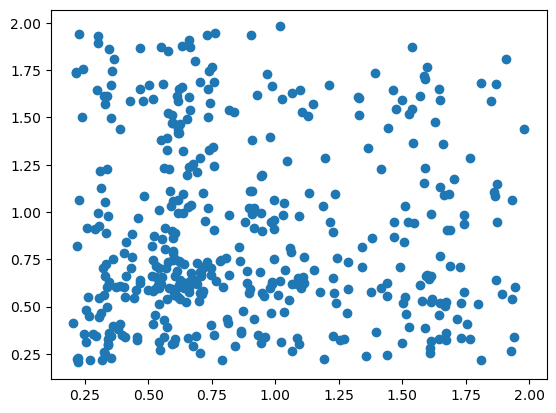

In [592]:
# For completeness plot the redshifts I brought over from my export_df against the ones in the zfourge_df
plt.scatter(zfourge_df['zpk'], export_df['zpk'])

In [602]:
y = zfourge_df[['zpk', 'id']].sort_values(by='id')




In [603]:
x = export_df[['zpk', 'ID']].sort_values(by='ID')


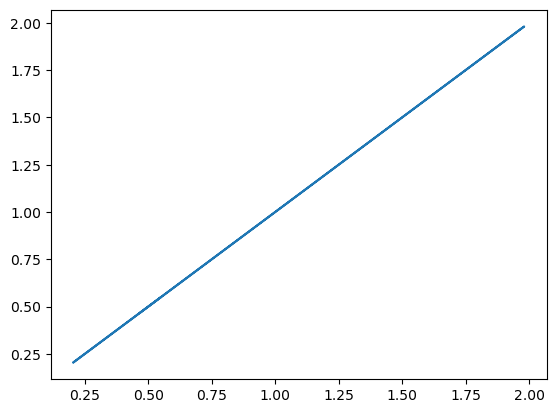

In [609]:
plt.plot(x['zpk'], y['zpk'])    # straight line indicates that all redshifts are matched

# plot the UV entries for each export_df and zfourge_df

# likewise for VJ, all on same graph


Text(0, 0.5, 'ZFOURGE')

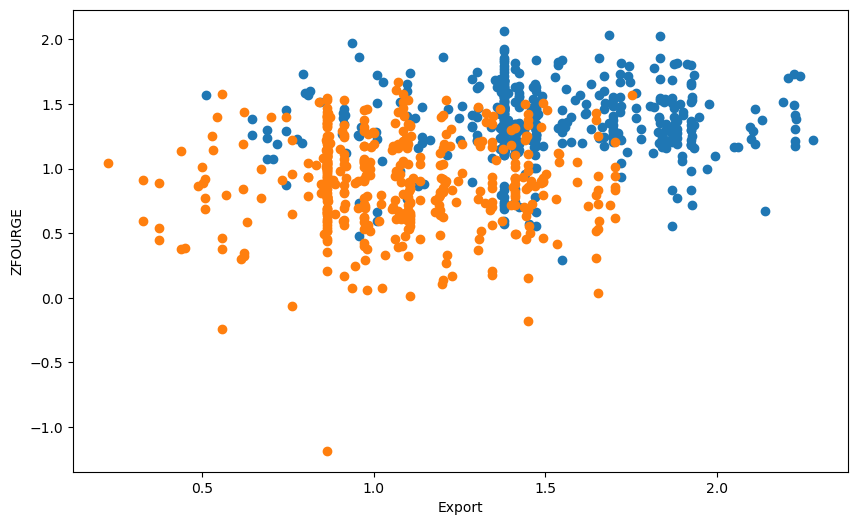

In [610]:

plt.figure(figsize=(10, 6))
plt.scatter(export_df['UV'], zfourge_df['UV'], label='UV')
plt.scatter(export_df['VJ'], zfourge_df['VJ'], label='VJ')
plt.xlabel('Export')
plt.ylabel('ZFOURGE')
#plt.xlabel('Restframe U-V [Mag]')
#plt.ylabel('Restframe V-J [Mag]')
